In [1]:
import xarray as xr
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import load_data
import wrf

In [2]:
data_main_path = '/glade/scratch/gutmann/step/'
W_data_main_path = '/glade/scratch/gutmann/step/wrf3d/'

model = 2

model_field = "REFL_10CM"
model_field = "W"

#
# model 1, see load_data.py REFL_10CM[::3,350:350+256,650:650+256]
# lat@350, lon@650: 29.948448187392394, -99.10653726754573
#

if model == 1:
    if model_field == "REFL_10CM":
        ds = xr.open_mfdataset('/glade/collections/rda/data/ds612.0/CTRLradrefl/REFL/wrf2d_d01_CTRL_REFL_10CM_200704-200706.nc', combine="nested", concat_dim='Time')
        data = ds.REFL_10CM[0:100,:,:].values
        data = data[:,np.newaxis,:,:]
        sub_data = ds.REFL_10CM[0:100,350:350+256,650:650+256].values
        sub_data = sub_data[:,np.newaxis,:,:]
    else:
        ds = xr.open_mfdataset('/glade/collections/rda/data/ds612.0/CTRL3D/2007/wrf3d_d01_CTRL_W_20070401.nc', combine="nested", concat_dim='Time')
        data = ds.W[0:100,0,:,:].values
        sub_data = ds.W[0:100,0,350:350+256,650:650+256].values
        
    lat = ds.XLAT.values
    lon = ds.XLONG.values
    sub_lat = ds.XLAT[350:350+256,650:650+256].values
    sub_lon = ds.XLONG[350:350+256,650:650+256].values

#
# model 2 with 5 min refl data, use 0:256, 366:366+256 to get a similar domain as model 1 runs
# this is true for REFL_10CM but when I open W it has a different grid.
#
if model == 2:
    ref_yoffset = 256
    ref_xoffset = 185
    if model_field == "REFL_10CM":
        ds = xr.open_mfdataset(os.path.join(data_main_path, "2014/uncompressed/wrf5mn_d01_2014-09-30_00:00:00"), combine="nested", concat_dim='Time')
        data = ds.REFL_10CM.values
        latlonFile = '/glade/work/kyoko/CONUS_HYDRO/PhaseII/src/production04km/wrf04km_refl_clipped_coord.nc'
        latlon_ds = xr.open_mfdataset(latlonFile, combine="nested", concat_dim='TIME')
        #
        yoffset = 256
        xoffset = 185
        #sub_data = ds.REFL_10CM[0:100,0,0:256,366:366+256].values
        #sub_data = sub_data[:,np.newaxis,:,:]
        #sub_lat = latlon_ds.XLAT[0,0:256,366:366+256].values
        #sub_lon = latlon_ds.XLONG[0,0:200,366:366+256].values
        sub_data = ds.REFL_10CM[0:10,0,ref_yoffset:ref_yoffset+256,ref_xoffset:ref_xoffset+256].values
        sub_data = sub_data[:,np.newaxis,:,:]
        sub_lat = latlon_ds.XLAT[0,ref_yoffset:ref_yoffset+256,ref_xoffset:ref_xoffset+256].values
        sub_lon = latlon_ds.XLONG[0,ref_yoffset:ref_yoffset+256,ref_xoffset:ref_xoffset+256].values
       #
    else:
        yoffset = ref_yoffset + 130
        xoffset = ref_xoffset + 560
        print('W yoffset:',yoffset)
        print('W xoffset:',xoffset)
        ds = xr.open_mfdataset(os.path.join(W_data_main_path, "2014/uncompressed/wrf3d_d01_2014-09-30_*"), combine="nested", concat_dim='Time')
        data = ds.W.values
        latlonFile = '/glade/work/kyoko/CONUS_HYDRO/PhaseII/src/production04km/wrf04km_coord.nc'
        latlon_ds = xr.open_mfdataset(latlonFile, combine="nested", concat_dim='TIME')
        sub_data = ds.W[0:3,:,yoffset:yoffset+256,xoffset:xoffset+256].values
        sub_lat = latlon_ds.XLAT[0,yoffset:yoffset+256,xoffset:xoffset+256].values
        sub_lon = latlon_ds.XLONG[0,yoffset:yoffset+256,xoffset:xoffset+256].values
    
    lat = latlon_ds.XLAT[0,:,:].values
    lon = latlon_ds.XLONG[0,:,:].values


W yoffset: 386
W xoffset: 745


In [3]:
print(sub_data.shape)

(3, 51, 256, 256)


In [4]:
if model_field == "REFL_10CM":
    print(ds.REFL_10CM)
    ny = ds.REFL_10CM['south_north'].size
    nx = ds.REFL_10CM['west_east'].size
else:
    print(ds.W)
    ny = ds.W['south_north'].size
    nx = ds.W['west_east'].size
   

<xarray.DataArray 'W' (Time: 8, bottom_top_stag: 51, south_north: 1419, west_east: 1429)>
dask.array<concatenate, shape=(8, 51, 1419, 1429), dtype=float32, chunksize=(1, 51, 1419, 1429), chunktype=numpy.ndarray>
Dimensions without coordinates: Time, bottom_top_stag, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  z-wind component
    units:        m s-1
    stagger:      Z
    coordinates:  XLONG XLAT XTIME


In [5]:
at = ds.attrs

dx = at['DX'] 
width = dx * nx

dy = at['DY']
height = dy * ny

central_lat = at['CEN_LAT']
central_lon = at['CEN_LON']

lat_1 = at['TRUELAT1']
lat_2 = at['TRUELAT2']

In [6]:
print(dx, dy, nx, ny, central_lat, central_lon, lat_1, lat_2)

4000.0 4000.0 1429 1419 46.9 -99.0 35.0 60.0


In [7]:
t = ds.XTIME.values

In [8]:
print(t[0:10])

['2014-09-25T00:00:00.000000000' '2014-09-25T03:00:00.000000000'
 '2014-09-25T06:00:00.000000000' '2014-09-25T09:00:00.000000000'
 '2014-09-25T12:00:00.000000000' '2014-09-25T15:00:00.000000000'
 '2014-09-25T18:00:00.000000000' '2014-09-25T21:00:00.000000000']


In [9]:
print('nx =', nx)
print('ny =',ny)
print('DX =', dx)
print('DY =', dy) 
print('width =', width)
print('height =',height)
print('lat_1 =',lat_1)
print('lat_2 =',lat_2)
print('central_lat =', central_lat)
print('central_lon =', central_lon)

nx = 1429
ny = 1419
DX = 4000.0
DY = 4000.0
width = 5716000.0
height = 5676000.0
lat_1 = 35.0
lat_2 = 60.0
central_lat = 46.9
central_lon = -99.0


In [10]:
print(data.shape, lat.shape, lon.shape)
#im = data[0,0,:,:]

#print(sub_data.shape, sub_lat.shape, sub_lon.shape)
im = sub_data[0,0,:,:]
lat = sub_lat
lon = sub_lon
#print(im.shape, lat.shape, lon.shape)

(8, 51, 1419, 1429) (1419, 1429) (1419, 1429)


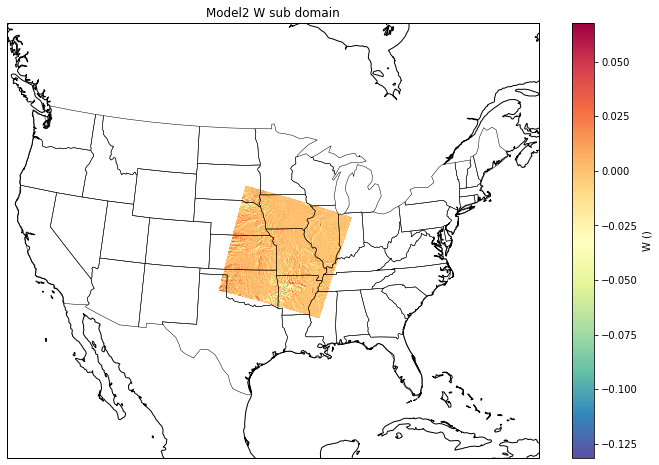

In [11]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.cm.Spectral_r

extent = [-100, -80, 20, 35]
extent = [-102, -85, 30, 45] # sub_data domain
extent = [-120, -70, 18, 55] # conus domain
#extent = [-135, -55, 10, 72] # full domain

cmap = plt.cm.Spectral_r
plt.figure(figsize=(12, 8))


proj = ccrs.LambertConformal(central_latitude = 25, 
                             central_longitude = 265, 
                             standard_parallels = (25, 25))

ax = plt.axes(projection = proj)
plt.pcolormesh(lon, lat, im, cmap=cmap, transform = ccrs.PlateCarree())
#plt.contourf(lon, lat, im, cmap=cmap, transform = ccrs.PlateCarree())

#
# Not sure how this is different from cf.STATES
#
#ax.add_feature(cf.NaturalEarthFeature(
#               category='cultural',
#               name='admin_1_states_provinces_lines',
#               scale='50m',
#               facecolor='none', edgecolor='black'))

#
# This can be turned off and the domain will be data driven
#
ax.set_extent(extent)

ax.coastlines('50m', edgecolor='black')
#ax.add_feature(cf.BORDERS, edgecolor='black')
ax.add_feature(cf.STATES, edgecolor='black', linewidth=0.5)
#ax.add_feature(cf.OCEAN)
#ax.add_feature(cf.LAND, facecolor='beige', edgecolor='none')
#ax.add_feature(cf.LAKES, edgecolor='black')
#ax.add_feature(cf.RIVERS)
#ax.gridlines()

#plt.colorbar(label='Reflectivity (dBZ)')
#plt.title('Model1 Reflectivity sub domain')

plt.colorbar(label='W ()')
plt.title('Model2 W sub domain')

#plt.show()
plt.savefig("model2_sub_domain_conus_view_W.png")

In [ ]:
#
# Basemap for second model with 5 minute refl data
#
from mpl_toolkits.basemap import Basemap as Basemap

cmap = plt.cm.Spectral_r
fig = plt.figure(figsize=(10, 8))
m = Basemap(width=width,
            height=height, 
            resolution='l',
            area_thresh=1000,
            projection='lcc',
            lat_1=lat_1,lat_2=lat_2,
            lat_0=central_lat,
            lon_0=central_lon)
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=20, urcrnrlat=60,
            llcrnrlon=-110,urcrnrlon=-70,)

m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.pcolormesh(lon, lat, im,
             latlon=True, cmap=cmap)
plt.clim(-35, 50)
plt.colorbar(label='temperature anomaly (°C)')


lons=[]
lats=[]
iy=0
for y in np.linspace(m.ymin,m.ymax,ny, endpoint=False):
    ix = 0
    for x in np.linspace(m.xmin,m.xmax,nx, endpoint=False):
        lon, lat = m(x,y,inverse=True)
        if ix == 0:
            lats.append(lat)
        if iy == 0:
            lons.append(lon)
        ix = ix + 1
    iy = iy + 1

#lon, lat = np.meshgrid(lons, lats)
#xi, yi = m(lon, lat)
